<a href="https://colab.research.google.com/github/Kaushal-Top5699/tensorflow_regression/blob/main/tensorflow_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression in Neural Networks**
Introduction to Regression in Neural Networks in Tensorflow.
Predicting numerical values based on someother combination of values or more specifically variables.

In [1]:
import tensorflow as tf
tf.__version__

'2.11.0'

Creating data to view and fit.

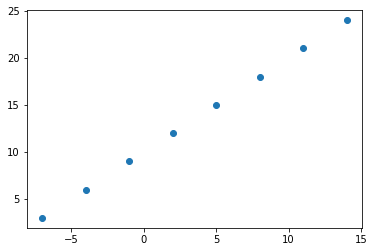

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Creating features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Creating lables
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualise it
plt.scatter(X, y)

In [3]:
# Try find relation between X and y. Its basically X + 10. For example, -7.0 + 10 = 3.0 and same is the case with other features and lables.
# Perform a check
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

The model will basically return a number or predict a number or what 'y' should be when we pass it an 'X'. So after all the work is done if we pass it a number say, 17.0 the model should output 27.0 (Remeber the relation between X and y is? its X + 10). This is what we are trying to do here, happy learning.

In [4]:
# Verify our check
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [5]:
# Create a demo tensor for housing price prediction problem.
house_info = tf.constant(["bedroom", "bathroom", "gurage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'gurage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
# Note that the input X is a scalar and same is the output, lets check, because if it is then it should have 0 dimensions.
# Remember we want one feature which is one of the elements of X and then predict or output one value or number which again an element of y.
X[0].ndim, y[0].ndim

(0, 0)

In [8]:
# Lets turn our numpy arrays into tensors. More specifically, turning data into tensors!
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

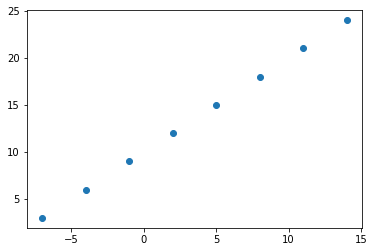

In [10]:
plt.scatter(X, y)

## **Steps for modelling with tensorflow**
1) **Creating a model** - defining the number of input and output layers, as well as the hindden layers of deep learning model.

2) **Compile the model** - defining the loss function (which tells our model how wrong it is), the optimizer (which tells our model how to correct the error) and evaluation matrix (which we can use to interpret the performance of our model).

3) **Fitting the model** - leting the model try to find patterns between X and y (features and labels).

In [11]:
# Set the random seed.
tf.random.set_seed(42)

# 1) Create the model. Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # Note that we want to take one feature and predict the output therefore, 1.
])


# 2) Compile the model.
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# MAE is Mean Absolute Error (On Avg. how wrong our model is?)
# SGD is Stcochastic Gradient Descent


# 3) Fit the model. (Here we fit the model and tell it you have 5 chances to look at the patterns and finally start the prediction).
X_input = tf.expand_dims(X, axis = 1) # No of dimensions of one input is Zero and that gave error so I increased the dimensions by 1.
model.fit(X_input, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 8.9267 - mae: 8.9267
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 8.7942 - mae: 8.7942
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 8.6617 - mae: 8.6617
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 8.5292 - mae: 8.5292
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 8.3967 - mae: 8.3967


In [12]:
# This is how X and y looks like.
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Now lets try to make a prediction.
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 81ms/step


array([[25.238115]], dtype=float32)

In [14]:
# Now if you look at last epoch data, its says on avg. our model will make mistake approximately 10.6 points off. Lets try it to add those 10.6 points,
# our predicted value and check how correct or closer is the prediction of model now.
y_pred + 10.6
# Pretty close to actual answer which is 27.0

array([[35.838116]], dtype=float32)

### Improving our model. Now since, we are getting wrong predictions lets try to improve it.
We can improve the model by altering the steps we used while creating the model.

1) **Create Model** - we might increase the number of layers, neurons and change activation or transfer functions within each layer.

2) **Compile Model** - we might change the optimization function and perhaps the **learning rate** of the optimization function.

3) **Fitting Model** - we might increase the number of **epochs**, or on more **Data**.

In [15]:
# Lets create the same model again with improvements.
tf.random.set_seed(42)

# Create Model
improved_model = tf.keras.Sequential([
    # These are the 2 hidden layers
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    # These are the 2 hidden layers
    tf.keras.layers.Dense(1)
    # Totally, we have 4 layers with 100 in each of the hidden layers and one in 4th layer.
])

# Compile Model
improved_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), # Learning Rate is the most important hyperparameter in Neural Networks. 
                       metrics=["mae"])

# Fitting Model
X_input = tf.expand_dims(X, axis = 1) # Don't forget increase the dimension to prevent the error.
improved_model.fit(X_input, y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 12.7895 - mae: 12.7895
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 10.6273 - mae: 10.6273
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 7.9186 - mae: 7.9186
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 4.6159 - mae: 4.6159
Epoch 5/500
1/1 [==============================] - 0s 13ms/step - loss: 5.1975 - mae: 5.1975
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 6.6017 - mae: 6.6017
Epoch 7/500
1/1 [==============================] - 0s 16ms/step - loss: 6.2274 - mae: 6.2274
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 5.2677 - mae: 5.2677
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 4.1109 - mae: 4.1109
Epoch 10/500
1/1 [==============================] - 0s 13ms/step - loss: 3.8500 - mae: 3.8500
Epoch 11/500
1/1 [==============================] - 0s 10ms/step - l

In [16]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
y_pred = improved_model.predict([17.0])
y_pred

1/1 [==============================] - 0s 108ms/step


array([[28.356165]], dtype=float32)

# **Evaluating**

Lets start with creating larger dataset.

In [18]:
X = tf.range(-100, 100, 4)
X
# Numbers from -100 to 100 with a step size of 4

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Creating labels for the dataset.
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

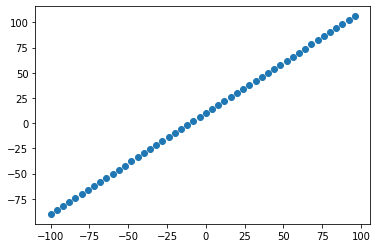

In [20]:
# Visualize the data.
import matplotlib.pyplot as plt
plt.scatter(X, y)

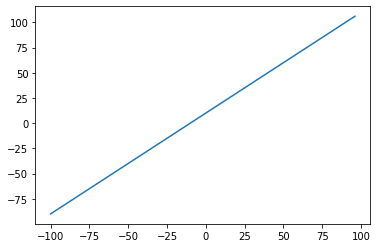

In [21]:
plt.plot(X, y)

# **Splitting data into 3 sets...**

1) **Training set** - 70%-80% of the dataset, model learns from this data.

2) **Validation set** - using this dataset model is tunned or tweeked, like chnaging hyperparameters. Typically 10%-15% of the data availale.

3) **Test set** - model gets evaluated on this data, its 10%-15%.

In [22]:
# Lets check the size of data available.
len(X)

50

In [23]:
# Splitting data into train and test. Validation is another split done when data size is a 100+.
X_train = X[:40] # 80% of the data (the first 40 samples).
y_train = y[:40]

X_test = X[40:] # 20% of the data (the last 10 samples).
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

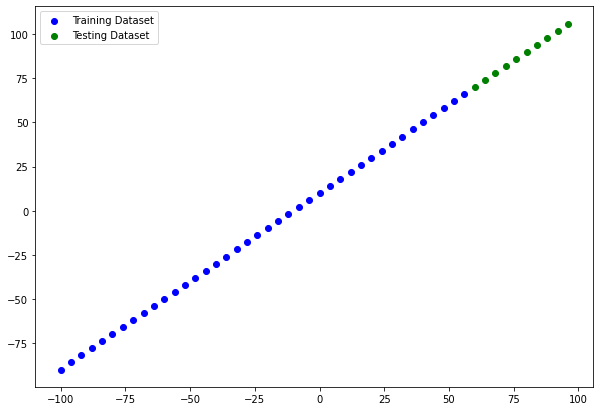

In [24]:
# Visualize the datasets.
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training Dataset")
plt.scatter(X_test, y_test, c="g", label="Testing Dataset")
plt.legend()

## Building a model for above data

In [25]:
tf.random.set_seed(42)

# Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile Model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])

# Fitting Model
model_2.fit(tf.expand_dims(X_train, axis = 1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 16ms/step - loss: 41.5437 - mae: 41.5437
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 37.1088 - mae: 37.1088
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 33.5454 - mae: 33.5454
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 30.1366 - mae: 30.1366
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 26.8855 - mae: 26.8855
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 23.8126 - mae: 23.8126
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 20.4525 - mae: 20.4525
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 16.8996 - mae: 16.8996
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 13.3218 - mae: 13.3218
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 10.0646 - mae: 10.0646
Epoch 11/500
2/2 [==============================] - 0s 7m

In [26]:
# Actual values
X_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [27]:
# Testing
y_pred = model_2.predict([X_test])
y_pred

1/1 [==============================] - 0s 96ms/step


array([[ 73.57807 ],
       [ 77.81014 ],
       [ 82.04224 ],
       [ 86.27431 ],
       [ 90.50641 ],
       [ 94.73849 ],
       [ 98.970566],
       [103.202644],
       [107.43474 ],
       [111.66681 ]], dtype=float32)

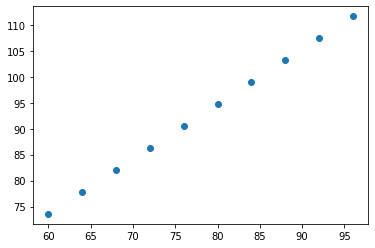

In [28]:
plt.scatter(X_test, y_pred)

In [29]:
# Creating a model that builds automatically by defining the input_shape argument
import tensorflow as tf
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(100, input_shape=[1], name = "hidden_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "model_1")

model.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mse"])

# model.fit(tf.expand_dims(X_train, axis = 1), y_train, epochs = 100)

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 hidden_layer (Dense)        (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


## **What is that summary!**
Total Params - Total number of parameters in the model.

Trainable params - Parameters the model can update as it trains.

Non-trainable params - These are the parameters aren't updated while training.

In [31]:
model.fit(X_train, y_train, epochs = 200, verbose = 0)

In [32]:
X_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [33]:
y_pred = model.predict([X_test])
y_pred

1/1 [==============================] - 0s 63ms/step


array([[ 69.99999 ],
       [ 73.99999 ],
       [ 77.99999 ],
       [ 81.99999 ],
       [ 85.99999 ],
       [ 90.      ],
       [ 93.999985],
       [ 97.999985],
       [101.99999 ],
       [106.      ]], dtype=float32)

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 hidden_layer (Dense)        (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


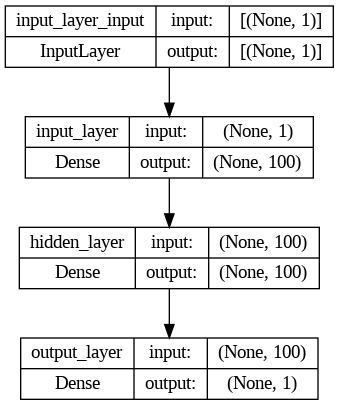

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

In [36]:
# Lets set a function for plotting
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = y_pred):
  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, train_labels, c = "b", label = "Training Data")
  plt.scatter(test_data, test_labels, c = "g", label = "Testing Data")
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  plt.legend()

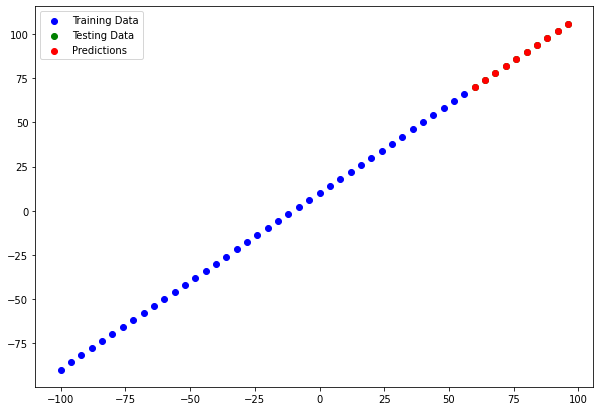

In [37]:
plot_predictions()

## Evaluation using regression evaluation matrics.

Here, we have two main metrices:

1) MAE - Mean Absolute Error.

2) MSE - Mean Square Error.

In [38]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 138ms/step - loss: 8.1491e-11 - mse: 8.1491e-11


[8.149072389107559e-11, 8.149072389107559e-11]

In [39]:
y_pred

array([[ 69.99999 ],
       [ 73.99999 ],
       [ 77.99999 ],
       [ 81.99999 ],
       [ 85.99999 ],
       [ 90.      ],
       [ 93.999985],
       [ 97.999985],
       [101.99999 ],
       [106.      ]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
mae = tf.reduce_mean(tf.abs(y_test - y_pred))
mae

<tf.Tensor: shape=(), dtype=int32, numpy=13>

In [42]:
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=7.6293945e-06>

In [43]:
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=8.1490724e-11>

In [44]:
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

In [45]:
# Model 1
tf.random.set_seed(42)

# Create Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

In [46]:
model_1.fit(tf.expand_dims(X_train, axis = 1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 18.7381 - mae: 18.7381
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6251 - mae: 11.6251
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.6425 - mae: 11.6425
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3543 - mae: 9.3543
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.2321 - mae: 10.2321
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4864 - mae: 9.4864
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6167 - mae: 8.6167
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0441 - mae: 9.0441
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.8754 - mae: 18.8754
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1801 - mae: 10.1801
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

In [47]:
X_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [48]:
y_pred = model_1.predict([X_test])
y_pred

1/1 [==============================] - 0s 57ms/step


array([[56.536777],
       [60.21877 ],
       [63.90076 ],
       [67.582756],
       [71.264755],
       [74.94675 ],
       [78.62874 ],
       [82.31074 ],
       [85.99273 ],
       [89.67472 ]], dtype=float32)

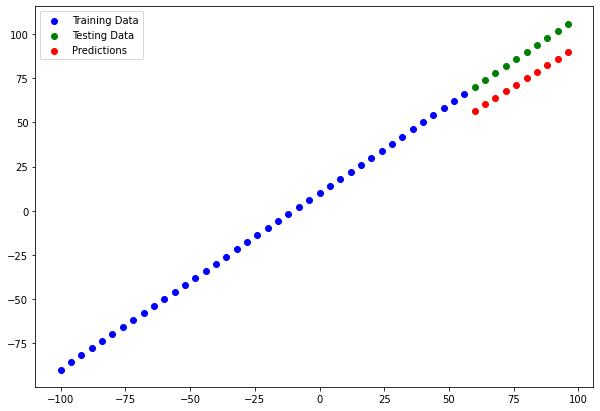

In [49]:
plot_predictions(predictions = y_pred)

In [50]:
mae_1 = mae(y_test, y_pred)
mse_1 = mse(y_test, y_pred)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.894251>,
 <tf.Tensor: shape=(), dtype=float32, numpy=222.673>)

In [51]:
# Model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mse'])

In [52]:
model_2.fit(tf.expand_dims(X_train, axis = 1), y_train, epochs = 100, verbose=0)

In [53]:
X_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [54]:
y_pred = model_2.predict([X_test])
y_pred

1/1 [==============================] - 0s 51ms/step


array([[34.92176 ],
       [37.15325 ],
       [39.38474 ],
       [41.61623 ],
       [43.84772 ],
       [46.07921 ],
       [48.3107  ],
       [50.542187],
       [52.77368 ],
       [55.00517 ]], dtype=float32)

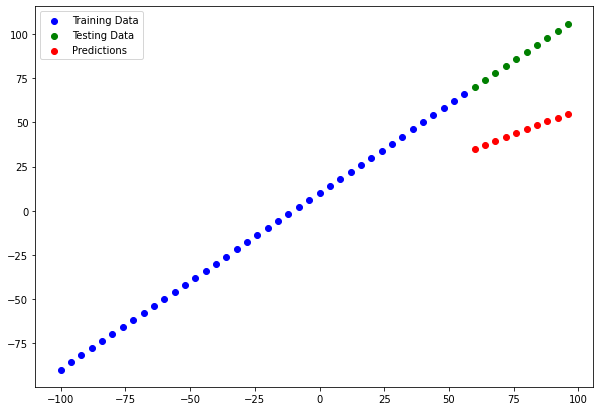

In [55]:
plot_predictions(predictions = y_pred)

In [56]:
mae_2 = mae(y_test, y_pred)
mse_2 = mse(y_test, y_pred)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=43.036537>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1877.9463>)

# Model 3

In [68]:
# Model 3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

In [69]:
model_3.fit(tf.expand_dims(X_train, axis = 1), y_train, epochs = 200, verbose = 0) # Never always overtrain, meaning always increasing number of epochs will not always improve model.

In [70]:
X_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [71]:
y_pred = model_3.predict([X_test])
y_pred

1/1 [==============================] - 0s 48ms/step


array([[ 69.99959 ],
       [ 74.57338 ],
       [ 79.147194],
       [ 83.72099 ],
       [ 88.29479 ],
       [ 92.8686  ],
       [ 97.442406],
       [102.016205],
       [106.59001 ],
       [111.1638  ]], dtype=float32)

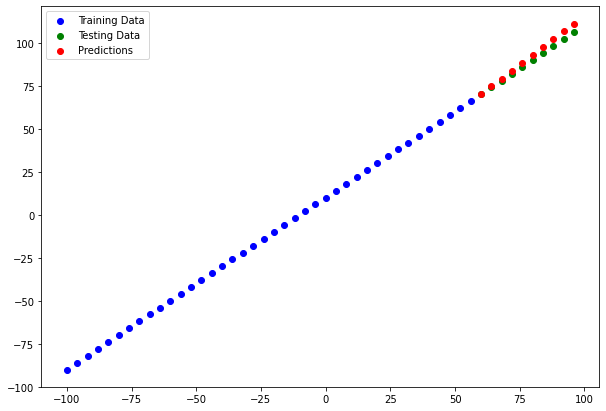

In [72]:
plot_predictions(predictions = y_pred)

In [62]:
mae_3 = mae(y_test, y_pred)
mse_3 = mse(y_test, y_pred)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=5.64172>,
 <tf.Tensor: shape=(), dtype=float32, numpy=32.021767>)

## **Compairing Results of our experiments.**

In [74]:
# Using pandas DataFrame to compair our model's results
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,14.894251,222.673004
1,model_2,43.036537,1877.946289
2,model_3,5.641720,32.021767


### **Saving our models**
Saving our models allow us to use them outside of google colab say, in a web application or mobile app.

There two main formats to save our model:

1. The SaveModel format.
2. The HDF5 format.

In [75]:
model_3.save('model_3_SavedModel_format')

In [76]:
# HDF5 format
model_3.save('model_3_HDF5_format.h5')

### **Loading our models**

In [79]:
load_model_3 = tf.keras.models.load_model('/content/model_3_SavedModel_format')
load_model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               200       
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [80]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               200       
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Lets test whether saved model is making same predictions as model_3.
# First lets check loaded model
y_saved_pred = load_model_3.predict(X_test)
y_saved_pred

1/1 [==============================] - 0s 72ms/step


array([[ 69.99959 ],
       [ 74.57338 ],
       [ 79.147194],
       [ 83.72099 ],
       [ 88.29479 ],
       [ 92.8686  ],
       [ 97.442406],
       [102.016205],
       [106.59001 ],
       [111.1638  ]], dtype=float32)

In [83]:
# Now lets check the model_2's prections
y_model_3_pred = model_3.predict(X_test)
y_model_3_pred

1/1 [==============================] - 0s 52ms/step


array([[ 69.99959 ],
       [ 74.57338 ],
       [ 79.147194],
       [ 83.72099 ],
       [ 88.29479 ],
       [ 92.8686  ],
       [ 97.442406],
       [102.016205],
       [106.59001 ],
       [111.1638  ]], dtype=float32)

Looks like the saved model works the same as model_3

(None, None)

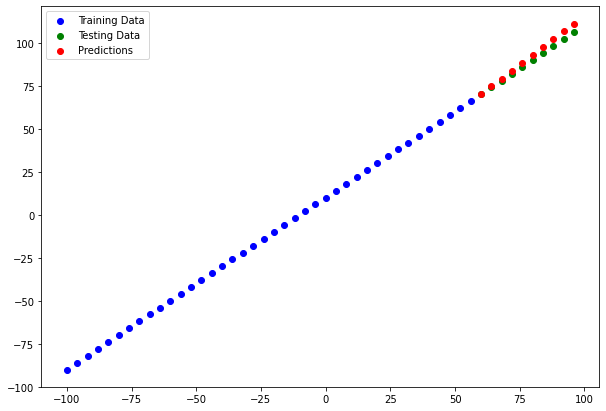

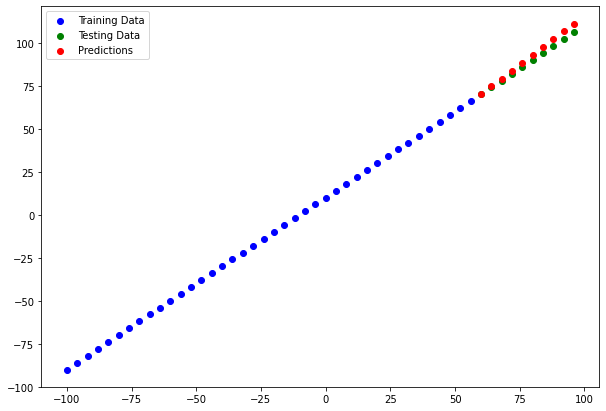

In [84]:
plot_predictions(predictions = y_saved_pred), plot_predictions(predictions = y_model_3_pred)